<a href="https://colab.research.google.com/github/nakampany/machine-learning-project/blob/master/K%E5%B9%B3%E5%9D%87%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# **サンプルデータ生成**

In [ ]:
X, y = make_blobs(n_samples=150, 
                  n_features=2, 
                  centers=3, 
                  cluster_std=0.5, 
                  shuffle=True, 
                  random_state=0)

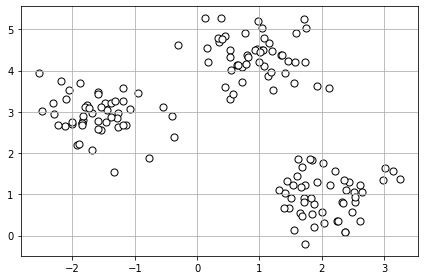

In [ ]:
plt.scatter(X[:, 0], X[:, 1], 
            c='white', marker='o', edgecolor='black', s=50)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_01.png', dpi=300)
plt.show()

# scikit-learnを使ったK-**means** 

In [ ]:
km = KMeans(n_clusters=3, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

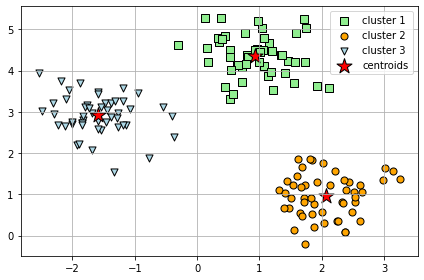

In [ ]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()


# **K-means++法を利用する**

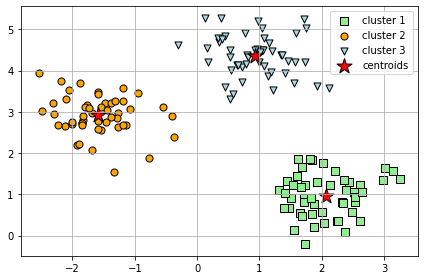

In [ ]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50, c='lightgreen',
            marker='s', edgecolor='black',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50, c='lightblue',
            marker='v', edgecolor='black',
            label='cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s=250, marker='*',
            c='red', edgecolor='black',
            label='centroids')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_02.png', dpi=300)
plt.show()

# **エルボー法**

In [ ]:
print('Distortion: %.2f' % km.inertia_)

Distortion: 72.48


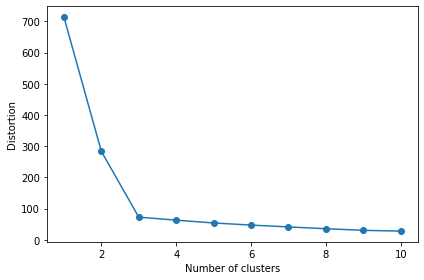

In [ ]:
#0～10のクラスの数、ひじの３のところがいいだろう。。。
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 　　
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()


# **シルエット係数**

**クラスタ3つの時**

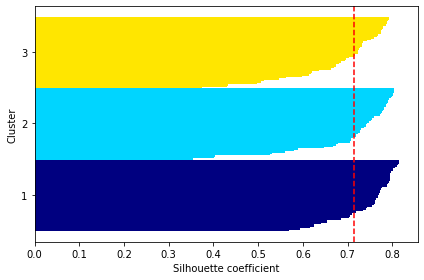

In [ ]:
km = KMeans(n_clusters=3, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_04.png', dpi=300)
plt.show()

**クラスタ2個のモデルでは。。。**

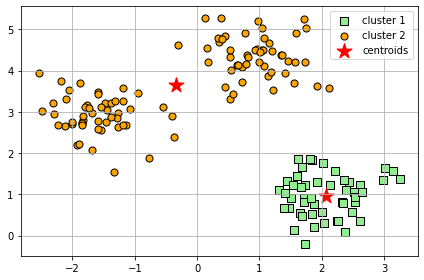

In [ ]:
km = KMeans(n_clusters=2,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

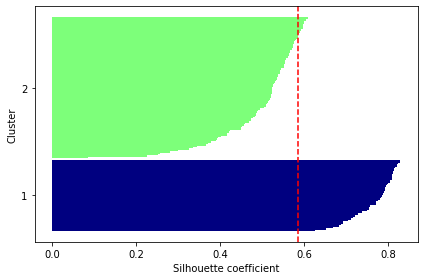

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()

**クラスタ4個のモデルでは。。。**

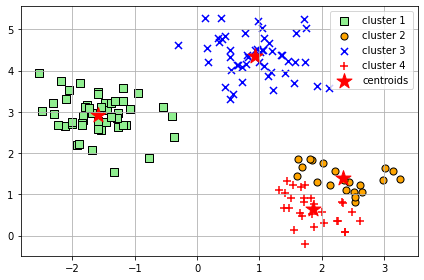

In [ ]:
km = KMeans(n_clusters=4,
            init='k-means++',
            n_init=10,
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(X)


plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s=50,
            c='lightgreen',
            edgecolor='black',
            marker='s',
            label='cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s=50,
            c='orange',
            edgecolor='black',
            marker='o',
            label='cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s=50,
            c='blue',
            edgecolor='black',
            marker='x',
            label='cluster 3')
plt.scatter(X[y_km == 3, 0],
            X[y_km == 3, 1],
            s=50,
            c='red',
            edgecolor='black',
            marker='+',
            label='cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
            s=250, marker='*', c='red', label='centroids')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('images/11_05.png', dpi=300)
plt.show()

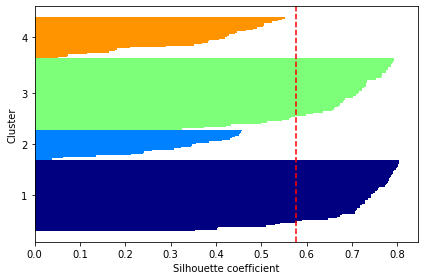

In [ ]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
#plt.savefig('images/11_06.png', dpi=300)
plt.show()


# **DBSCANもいい方法！！**

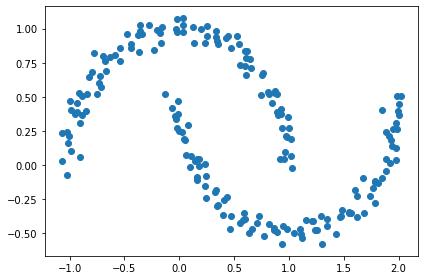

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
#plt.savefig('images/11_14.png', dpi=300)
plt.show()


**K-means法ではクラスタに失敗してしまう。** 

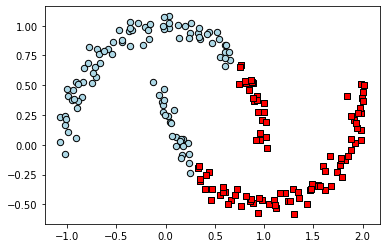

In [ ]:
# K-means
km = KMeans(n_clusters=2, random_state=0)
y_km = km.fit_predict(X)
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1],
            edgecolor='black',
            c='lightblue', marker='o', s=40, label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1],
            edgecolor='black',
            c='red', marker='s', s=40, label='cluster 2')
plt.show()

**DBSCAN**

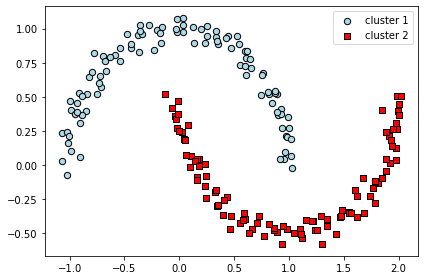

In [ ]:
# Density-based clustering:
db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0], X[y_db == 0, 1],
            c='lightblue', marker='o', s=40,
            edgecolor='black', 
            label='cluster 1')
plt.scatter(X[y_db == 1, 0], X[y_db == 1, 1],
            c='red', marker='s', s=40,
            edgecolor='black', 
            label='cluster 2')
plt.legend()
plt.tight_layout()
#plt.savefig('images/11_16.png', dpi=300)
plt.show()

# **自己組織化マップ(SOMSOM)**

linaxコマンド

gitcloneでダウンロード

In [ ]:
!git clone https://github.com/diego-vicente/som-tsp.git

Cloning into 'som-tsp'...
remote: Enumerating objects: 254, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 254 (delta 37), reused 35 (delta 35), pack-reused 206
Receiving objects: 100% (254/254), 5.35 MiB | 31.67 MiB/s, done.
Resolving deltas: 100% (108/108), done.


In [ ]:
!ls

assets	diagrams  LICENSE  README.org  report  requirements.txt  src


In [ ]:
%cd som-tsp/

/content/som-tsp


In [ ]:
#現在作業しているディレクトリ表示
!pwd

/content/som-tsp


In [ ]:
!python src/main.py assets/qa194.tsp

Problem with 194 cities read.
Network of 1552 neurons created. Starting the iterations:
Radius has completely decayed, finishing execution at 24487 iterations
Route found of length 9888.9532990499


In [ ]:
#imgemagicを利用してGIFに変換
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libcupsfilters1 libcupsimage2
  libdjvulibre-text libdjvulibre21 libgs9 libgs9-common libijs-0.35
  libjbig2dec0 liblqr-1-0 libmagickcore-6.q16-3 libmagickcore-6.q16-3-extra
  libmagickwand-6.q16-3 libnetpbm10 libwmf0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng
  enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance
  sane-utils texlive-base-bin transfig ufraw-batch inkscape libjxr-tools
  libwmf0.2-7-gtk poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

# **194都市**

In [ ]:
!convert -delay 10 -loop 0 -alpha remove diagrams/*0.png diagrams/qa194.gif

# **734都市**

In [ ]:
!python src/main.py assets/uy734.tsp

Problem with 734 cities read.
Network of 5872 neurons created. Starting the iterations:
Radius has completely decayed, finishing execution at 28922 iterations
Route found of length 84946.57220832034


In [ ]:
!convert -delay 10 -loop 0 -alpha remove diagrams/*0.png diagrams/uy734.gif

In [ ]:
%cd ..

/content


In [ ]:
! tar xvfz JAFFE.tar.gz

JAFFE/
JAFFE/TM.SA1.184.jpeg
JAFFE/KA.HA1.29.jpeg
JAFFE/TM.NE1.177.jpeg
JAFFE/YM.DI3.66.jpeg
JAFFE/KR.HA2.75.jpeg
JAFFE/UY.DI1.149.jpeg
JAFFE/KL.SA1.161.jpeg
JAFFE/KM.SU3.16.jpeg
JAFFE/KL.FE2.175.jpeg
JAFFE/NA.AN3.213.jpeg
JAFFE/KL.AN3.169.jpeg
JAFFE/YM.FE2.68.jpeg
JAFFE/NA.FE3.219.jpeg
JAFFE/KR.SU3.82.jpeg
JAFFE/NM.AN3.106.jpeg
JAFFE/YM.FE3.69.jpeg
JAFFE/UY.NE3.136.jpeg
JAFFE/NA.DI2.215.jpeg
JAFFE/KA.NE1.26.jpeg
JAFFE/KL.DI1.170.jpeg
JAFFE/MK.AN2.126.jpeg
JAFFE/MK.NE1.113.jpeg
JAFFE/MK.AN3.127.jpeg
JAFFE/YM.AN3.63.jpeg
JAFFE/MK.SA1.119.jpeg
JAFFE/KA.AN1.39.jpeg
JAFFE/KA.SU2.37.jpeg
JAFFE/YM.NE2.50.jpeg
JAFFE/TM.HA2.181.jpeg
JAFFE/NA.FE2.218.jpeg
JAFFE/YM.NE3.51.jpeg
JAFFE/MK.DI1.128.jpeg
JAFFE/YM.AN2.62.jpeg
JAFFE/NA.AN2.212.jpeg
JAFFE/KL.AN2.168.jpeg
JAFFE/YM.HA2.53.jpeg
JAFFE/KM.SA5.13.jpeg
JAFFE/UY.FE1.152.jpeg
JAFFE/UY.AN2.147.jpeg
JAFFE/KR.NE1.71.jpeg
JAFFE/NA.HA3.204.jpeg
JAFFE/KM.HA2.5.jpeg
JAFFE/KA.FE1.45.jpeg
JAFFE/KL.DI4.173.jpeg
JAFFE/MK.DI3.130.jpeg
JAFFE/TM.DI1.193.jpeg
J

(256, 256)
float64


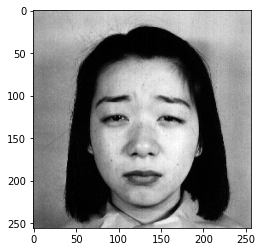

In [ ]:
from PIL import Image
import numpy as np

im = np.array(Image.open('JAFFE/YM.SA1.55.jpeg')).astype(np.float64)
print(im.shape)
print(im[0,0].dtype)

import matplotlib.pyplot as plt
plt.imshow(im, cmap="gray")

In [ ]:
import os
import glob
path = "JAFFE"
path_search = "JAFFE/KA*.jpeg"
file_path = glob.glob(path_search)

train_data = []

for f in file_path:
  img = np.array(Image.open(f).convert('L')).astype(np.float64) # グレースケールで読み込んでfloat64で表現する
  img = img[::4, ::4] # 256x256 の画像を 64x64にダウンサンプリング
  img = img.flatten() # 二次元配列から一次元配列にする
  train_data.append(img)

In [ ]:
train_data[0]
train_data[0].shape

(4096,)

**SOMの出力層のユニットの縦横サイズ**

In [ ]:
im_size = train_data[0].shape[0] #画像ファイルのサイズ

# SOMの出力層のユニットの縦横サイズ
row = 10
col = 10

# 各ユニットの重みベクトルの初期化
weight = np.random.random([row, col, im_size])

In [ ]:
print(weight[8,6])
print(weight[8,6].dtype)

[0.82419677 0.69743753 0.60801002 ... 0.54595636 0.21455313 0.33910224]
float64


In [ ]:
im_size = train_data[0].shape[0] #画像ファイルのサイズ

# SOMの出力層のユニットの縦横サイズ
row = 10
col = 10

# 各ユニットの重みベクトルの初期化
weight = np.random.random([row, col, im_size])

In [ ]:
print(weight[8,6])
print(weight[8,6].dtype)

[0.54365278 0.53015658 0.5994785  ... 0.76651676 0.03974059 0.51394617]
float64


In [ ]:
# SOMの学習

alpha = 0.2 # 学習率
def som(img):
    min_index = np.argmin(((weight-img)**2).sum(axis=2))
    mini = int(min_index / col)
    minj = int(min_index % col)

    # 縦横±2まで重みを入力イメージに近づくように修正する
    for i in range(-2,3):
        for j in range(-2,3):
            try:
                weight[mini+i,minj+j] += alpha * (img - weight[mini+i,minj+j])/(abs(i)+abs(j)+1)
            except:
                pass

In [ ]:
weight_images = []
for i in range(row):
  for j in range(col):
    weight_images.append(weight[i, j].reshape(64, -1)) # 重みの配列を64 x 64に変える

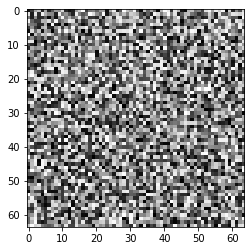

In [ ]:
# 適当な重み画像を表示
plt.imshow(weight_images[5], cmap="gray")

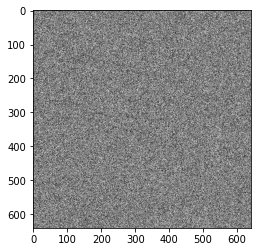

In [ ]:
# 重み画像を全て並べて表示する
weight_images_mat = np.concatenate((weight_images[0:col]), axis = 1)
for i in np.arange(1, row):
  weight_images_row = np.concatenate((weight_images[i*col:(i+1)*col]), axis = 1)
  weight_images_mat = np.concatenate((weight_images_mat, weight_images_row), axis = 0)
plt.imshow(weight_images_mat, cmap="gray")

In [ ]:
def save_weight_image(fname):
  # 重みの画像を生成
  weight_images = []
  for i in range(row):
    for j in range(col):
      weight_images.append(weight[i, j].reshape(64, -1)) # 重みの配列を64 x 64に変える
  # 重み画像を全て並べて表示する
  weight_images_mat = np.concatenate((weight_images[0:col]), axis = 1)
  for i in np.arange(1, row):
    weight_images_row = np.concatenate((weight_images[i*col:(i+1)*col]), axis = 1)
    weight_images_mat = np.concatenate((weight_images_mat, weight_images_row), axis = 0)
  # 重み画像を保存する
  pil_img_gray = Image.fromarray(weight_images_mat.astype(np.uint8))
  pil_img_gray.save(fname)

In [ ]:
# SOMの学習
learntime = 3000 #学習回数

import os
dir = "som-learning"
if not os.path.exists(dir):  # 無ければ
  os.makedirs(dir)  # 作る

for time in range(learntime):
  rand_id = np.random.randint(len(train_data))
  # print(rand_id)
  som(train_data[rand_id])
  # 100回ごとに重み画像を書き出す
  if time % 100 == 0:
    fname = os.path.join(dir, "{:010}".format(time)+".png")
    print(fname)
    save_weight_image(fname)

som-learning/0000000000.png
som-learning/0000000100.png
som-learning/0000000200.png
som-learning/0000000300.png
som-learning/0000000400.png
som-learning/0000000500.png
som-learning/0000000600.png
som-learning/0000000700.png
som-learning/0000000800.png
som-learning/0000000900.png
som-learning/0000001000.png
som-learning/0000001100.png
som-learning/0000001200.png
som-learning/0000001300.png
som-learning/0000001400.png
som-learning/0000001500.png
som-learning/0000001600.png
som-learning/0000001700.png
som-learning/0000001800.png
som-learning/0000001900.png
som-learning/0000002000.png
som-learning/0000002100.png
som-learning/0000002200.png
som-learning/0000002300.png
som-learning/0000002400.png
som-learning/0000002500.png
som-learning/0000002600.png
som-learning/0000002700.png
som-learning/0000002800.png
som-learning/0000002900.png


In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!convert -delay 10 -loop 0 -alpha remove som-learning/*0.png som-learning/learning.gif

# **レポート**

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
import os
import glob
path = "JAFFE"
path_search = "JAFFE/YM*.jpeg"
file_path = glob.glob(path_search)

train_data = []

for f in file_path:
  img = np.array(Image.open(f).convert('L')).astype(np.float64) # グレースケールで読み込んでfloat64で表現する
  img = img[::4, ::4] # 256x256 の画像を 64x64にダウンサンプリング
  img = img.flatten() # 二次元配列から一次元配列にする
  train_data.append(img)

In [ ]:
train_data[0]
train_data[0].shape

(4096,)

**SOMの出力層のユニットの縦横サイズ**

In [ ]:
im_size = train_data[0].shape[0] #画像ファイルのサイズ

# SOMの出力層のユニットの縦横サイズ
row = 10
col = 10

# 各ユニットの重みベクトルの初期化
weight = np.random.random([row, col, im_size])

In [ ]:
print(weight[8,6])
print(weight[8,6].dtype)

[0.15402854 0.9739875  0.04300307 ... 0.0658593  0.5350452  0.13718741]
float64


In [ ]:
im_size = train_data[0].shape[0] #画像ファイルのサイズ

# SOMの出力層のユニットの縦横サイズ
row = 10
col = 10

# 各ユニットの重みベクトルの初期化
weight = np.random.random([row, col, im_size])

In [ ]:
print(weight[8,6])
print(weight[8,6].dtype)

[0.67681954 0.14396427 0.15858511 ... 0.85932468 0.86163914 0.4526703 ]
float64


In [ ]:
# SOMの学習

alpha = 0.001 # 学習率
def som(img):
    min_index = np.argmin(((weight-img)**2).sum(axis=2))
    mini = int(min_index / col)
    minj = int(min_index % col)

    # 縦横±2まで重みを入力イメージに近づくように修正する
    for i in range(-2,3):
        for j in range(-2,3):
            try:
                weight[mini+i,minj+j] += alpha * (img - weight[mini+i,minj+j])/(abs(i)+abs(j)+1)
            except:
                pass

In [ ]:
weight_images = []
for i in range(row):
  for j in range(col):
    weight_images.append(weight[i, j].reshape(64, -1)) # 重みの配列を64 x 64に変える

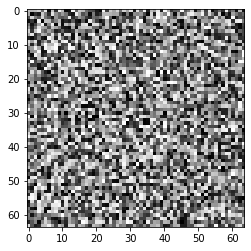

In [ ]:
# 適当な重み画像を表示
plt.imshow(weight_images[5], cmap="gray")

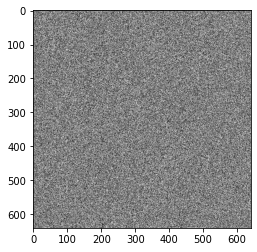

In [ ]:
# 重み画像を全て並べて表示する
weight_images_mat = np.concatenate((weight_images[0:col]), axis = 1)
for i in np.arange(1, row):
  weight_images_row = np.concatenate((weight_images[i*col:(i+1)*col]), axis = 1)
  weight_images_mat = np.concatenate((weight_images_mat, weight_images_row), axis = 0)
plt.imshow(weight_images_mat, cmap="gray")

In [ ]:
def save_weight_image(fname):
  # 重みの画像を生成
  weight_images = []
  for i in range(row):
    for j in range(col):
      weight_images.append(weight[i, j].reshape(64, -1)) # 重みの配列を64 x 64に変える
  # 重み画像を全て並べて表示する
  weight_images_mat = np.concatenate((weight_images[0:col]), axis = 1)
  for i in np.arange(1, row):
    weight_images_row = np.concatenate((weight_images[i*col:(i+1)*col]), axis = 1)
    weight_images_mat = np.concatenate((weight_images_mat, weight_images_row), axis = 0)
  # 重み画像を保存する
  pil_img_gray = Image.fromarray(weight_images_mat.astype(np.uint8))
  pil_img_gray.save(fname)

In [ ]:
# SOMの学習
learntime = 3000 #学習回数

import os
dir = "som-learning"
if not os.path.exists(dir):  # 無ければ
  os.makedirs(dir)  # 作る

for time in range(learntime):
  rand_id = np.random.randint(len(train_data))
  # print(rand_id)
  som(train_data[rand_id])
  # 100回ごとに重み画像を書き出す
  if time % 100 == 0:
    fname = os.path.join(dir, "{:010}".format(time)+".png")
    print(fname)
    save_weight_image(fname)

som-learning/0000000000.png
som-learning/0000000100.png
som-learning/0000000200.png
som-learning/0000000300.png
som-learning/0000000400.png
som-learning/0000000500.png
som-learning/0000000600.png
som-learning/0000000700.png
som-learning/0000000800.png
som-learning/0000000900.png
som-learning/0000001000.png
som-learning/0000001100.png
som-learning/0000001200.png
som-learning/0000001300.png
som-learning/0000001400.png
som-learning/0000001500.png
som-learning/0000001600.png
som-learning/0000001700.png
som-learning/0000001800.png
som-learning/0000001900.png
som-learning/0000002000.png
som-learning/0000002100.png
som-learning/0000002200.png
som-learning/0000002300.png
som-learning/0000002400.png
som-learning/0000002500.png
som-learning/0000002600.png
som-learning/0000002700.png
som-learning/0000002800.png
som-learning/0000002900.png


In [ ]:
!apt install imagemagick

Reading package lists... Done
Building dependency tree       
Reading state information... Done
imagemagick is already the newest version (8:6.9.7.4+dfsg-16ubuntu6.13).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!convert -delay 10 -loop 0 -alpha remove som-learning/*0.png som-learning/learning.gif